<a href="https://colab.research.google.com/github/Juliennnd/Cataract_Detection_Project/blob/main/Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of healthy eyes images in train directory: 140
Number of cataract eyes images in train directory: 283
Number of healthy eyes images in validation directory: 44
Number of cataract eyes images in validation directory: 120


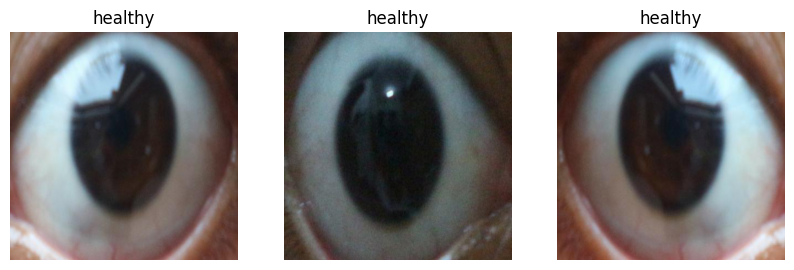

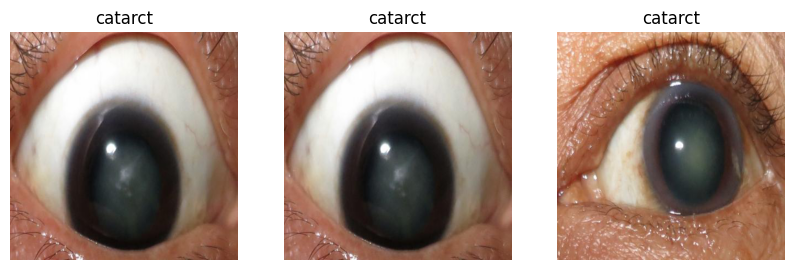

In [7]:
from PIL import Image


#drive.mount('/content/drive')

# Define the path to the folder containing the labeled images

train_data_dir ='/content/drive/MyDrive/Dataset_Project/Training_set'
testing_data_dir = '/content/drive/MyDrive/Dataset_Project/Testing_set'


healthy_dir = os.path.join(train_data_dir, 'healthy_eye')
cataract_dir = os.path.join(train_data_dir, 'cataract_eye')

# Count the number of images per class
healthy_count_train = len(os.listdir(os.path.join(train_data_dir, 'healthy_eye')))
cataract_count_train = len(os.listdir(os.path.join(train_data_dir, 'cataract_eye')))

healthy_count_testing = len(os.listdir(os.path.join(testing_data_dir, 'healthy_eye')))
cataract_count_testing = len(os.listdir(os.path.join(testing_data_dir, 'cataract_eye')))


print("Number of healthy eyes images in train directory:", healthy_count_train)
print("Number of cataract eyes images in train directory:", cataract_count_train)

print("Number of healthy eyes images in validation directory:", healthy_count_testing)
print("Number of cataract eyes images in validation directory:", cataract_count_testing)


# Plot 3 cat images
fig = plt.figure(figsize=(10,10))
for i in range(3):
    healthy_file = os.listdir(healthy_dir)[i]
    healthy_path = os.path.join(healthy_dir, healthy_file)
    healthy_img = Image.open(healthy_path)
    ax = fig.add_subplot(1, 3, i+1)
    ax.imshow(healthy_img)
    ax.axis('off')
    ax.set_title('healthy')

# Plot 3 catarct images
fig = plt.figure(figsize=(10,10))
for i in range(3):
    catarct_file = os.listdir(cataract_dir)[i]
    catarct_path = os.path.join(cataract_dir, catarct_file)
    catarct_img = Image.open(catarct_path)
    ax = fig.add_subplot(1, 3, i+1)
    ax.imshow(catarct_img)
    ax.axis('off')
    ax.set_title('catarct')

plt.show()

In [5]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

#drive.mount('/content/drive')


# Define the path to the folder containing the labeled images
train_data_dir ='/content/drive/MyDrive/Dataset_Project/Training_set'
validation_data_dir = '/content/drive/MyDrive/Dataset_Project/Testing_set'

# Define image parameters
img_width, img_height = 416, 416
input_shape = (img_width, img_height, 3)

# Define batch size and number of epochs
batch_size = 16 # à changer
epochs = 12

# Define data augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Define training and validation generators
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

# Train the model
history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))

# Save the model
save_path = '/content/drive/MyDrive/Dataset_Project/CNN_model.h5'
model.save(save_path)



Found 423 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


<ipython-input-5-fc4dc929a5fb>:65: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/12
27/27 [==============================] - 263s 10s/step - loss: 0.6756 - accuracy: 0.6903 - val_loss: 0.4001 - val_accuracy: 0.8293
Epoch 2/12
27/27 [==============================] - 279s 10s/step - loss: 0.1915 - accuracy: 0.9291 - val_loss: 0.2310 - val_accuracy: 0.8902
Epoch 3/12
27/27 [==============================] - 240s 9s/step - loss: 0.2121 - accuracy: 0.8983 - val_loss: 0.3805 - val_accuracy: 0.8293
Epoch 4/12
27/27 [==============================] - 294s 11s/step - loss: 0.1148 - accuracy: 0.9645 - val_loss: 0.1244 - val_accuracy: 0.9451
Epoch 5/12
27/27 [==============================] - 285s 11s/step - loss: 0.1104 - accuracy: 0.9480 - val_loss: 0.1992 - val_accuracy: 0.9451
Epoch 6/12
27/27 [==============================] - 256s 10s/step - loss: 0.0802 - accuracy: 0.9669 - val_loss: 0.6950 - val_accuracy: 0.8780
Epoch 7/12
27/27 [==============================] - 237s 9s/step - loss: 0.1145 - accuracy: 0.9574 - val_loss: 0.0807 - val_accuracy: 0.9756
Epoch 8/

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import drive

#drive.mount('/content/drive')


# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset_Project/CNN_model.h5')

# Define the path to the image you want to classify
img_path = '/content/drive/MyDrive/Dataset_Project/Application/grosse_cata.jpg'

# Load the image and resize it to match the input size of the model
img = image.load_img(img_path, target_size=(416, 416))

# Convert the image to a numpy array and normalize its values
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Make a prediction using the model and print the result
prediction = model.predict(x)
if prediction[0][0] < 0.5:
    print('No cataract')
else:
    print('Cataract')


1/1 [==============================] - 0s 206ms/step
No cataract


Found 41 images belonging to 2 classes.
3/3 [==============================] - 8s 2s/step - loss: 2.1420 - accuracy: 0.5854
validation loss: 2.142024278640747
validation accuracy: 0.5853658318519592


<ipython-input-10-848bf41c5a50>:22: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=1)


3/3 [==============================] - 6s 1s/step
              precision    recall  f1-score   support

 No cataract       0.46      0.52      0.49        21
    Cataract       0.41      0.35      0.38        20

    accuracy                           0.44        41
   macro avg       0.44      0.44      0.43        41
weighted avg       0.44      0.44      0.43        41



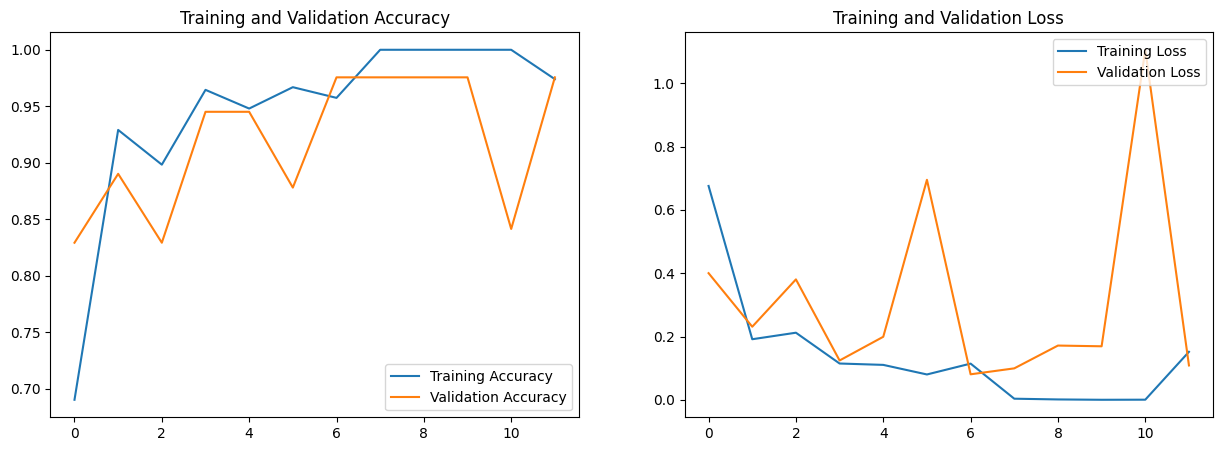

In [10]:
# Evaluate the model on the test set
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report



validation_data_dir = '/content/drive/MyDrive/Dataset_Project/Dataset_Maria/Training_set'
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')
        
loss, accuracy = model.evaluate(validation_generator)
print('validation loss:', loss)
print('validation accuracy:', accuracy)

# Get the predictions for the test set
validation_generator.reset()
preds = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=1)
y_true = validation_generator.classes
y_pred = np.round(preds)

print(classification_report(y_true, y_pred, target_names=['No cataract', 'Cataract']))

# Plot the accuracy and loss over epochs
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


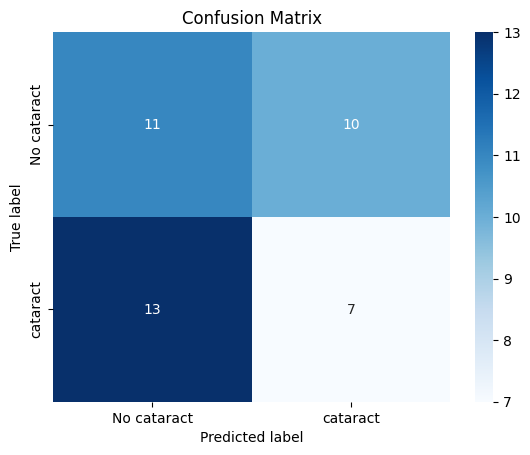

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# create labels for the classes
class_names = ['No cataract', 'cataract']

# create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# set axis labels
plt.xlabel('Predicted label')
plt.ylabel('True label')

# set title
plt.title('Confusion Matrix')

# show the plot
plt.show()

